**1. Import modules**

In [ ]:
'''
  Import all necessary modules
'''
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam, Adadelta
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
from sklearn import preprocessing
import seaborn as sns

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**2. Dataset Preparation**

In [ ]:
# Import dataset
df = pd.read_csv('/content/gdrive/MyDrive/TRM/Aisha/DL-dataset.csv')
df

,CPU-Utilization,Memory-Usage,Rank
0,31.160000,0.073234,257
1,30.560000,19.460000,413
2,73.534000,91.679000,1832
3,67.064000,81.436000,1636
4,57.205000,57.659000,1236
...,...,...,...
1995,62.822001,45.258514,1228
1996,40.587264,2.813903,432
1997,23.282108,14.571414,261
1998,30.443682,33.249180,529


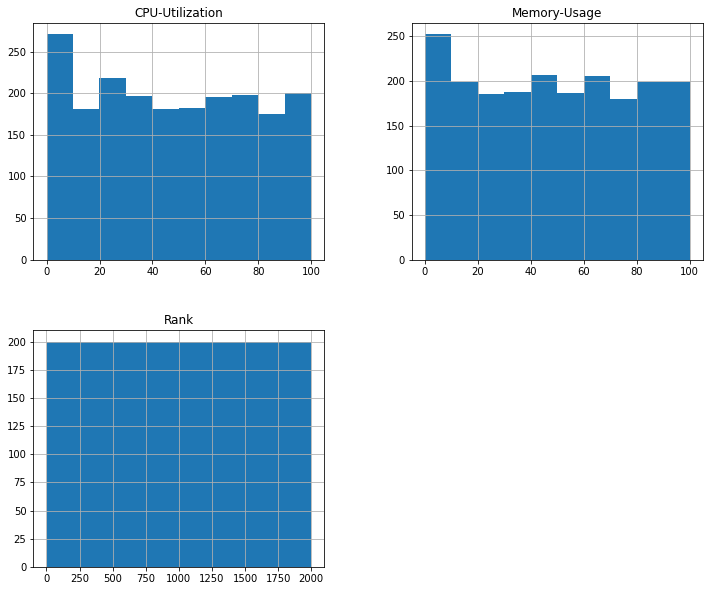

In [ ]:
df.hist(figsize = (12,10))
plt.show()

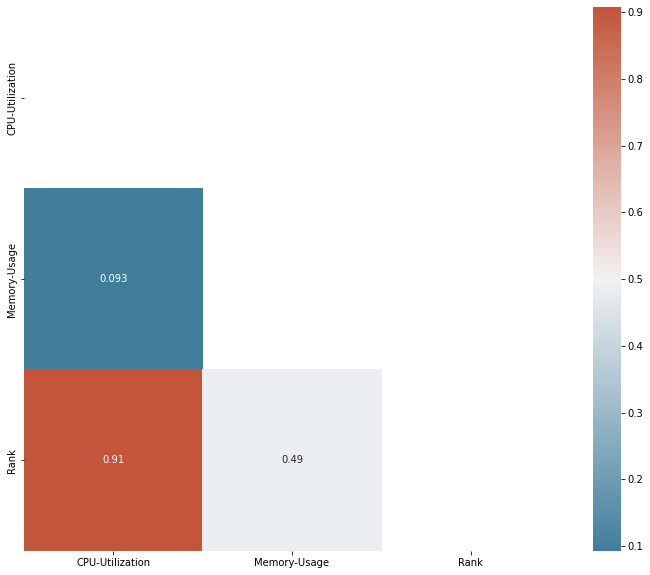

In [ ]:
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
# Create python dataframe
decisions = pd.DataFrame()
decisions['CPU-Utilization'] = df['CPU-Utilization']
decisions['Memory-Usage'] = df['Memory-Usage']
decisions['Rank'] = df['Rank']
decisions

,CPU-Utilization,Memory-Usage,Rank
0,31.160000,0.073234,257
1,30.560000,19.460000,413
2,73.534000,91.679000,1832
3,67.064000,81.436000,1636
4,57.205000,57.659000,1236
...,...,...,...
1995,62.822001,45.258514,1228
1996,40.587264,2.813903,432
1997,23.282108,14.571414,261
1998,30.443682,33.249180,529


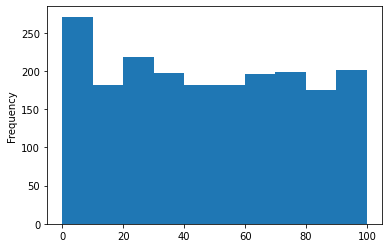

In [ ]:
df['CPU-Utilization'].plot(kind='hist');

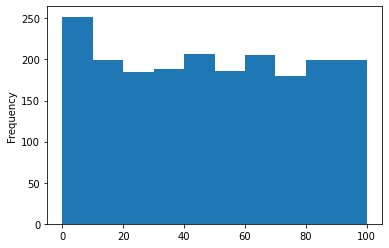

In [ ]:
df['Memory-Usage'].plot(kind='hist');

In [ ]:
'''
 Split dataset to train (70%), test (15%) and validation(15%) sets. 
 The top 30 values were removed from the dataset to be split. 
      * Reason for removal - We have to check the MAE of the top 30. The data should be unknown to the model to get
        accurate figures. 
'''

training_data = decisions[0: 1369]

test_data = decisions[1674:2000]

validation_data = decisions[1369:1674]


In [ ]:
# Split into input and output values
tmp_train = np.array(training_data)
X_train = tmp_train[:, :-1]
y_train = tmp_train[:, -1]

tmp_test = np.array(test_data)
X_test = tmp_test[:, :-1]
y_test = tmp_test[:, -1]

tmp_val = np.array(validation_data)
X_validation = tmp_val[:, :-1]
y_validation = tmp_val[:, -1]


**3. Model Preparation**

In [ ]:
seed(0)
set_random_seed(0)

In [ ]:
'''
 This function is used to display the training history of the dataset.
'''
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [ ]:
# 4 hidden layer neural network
model = Sequential()

n_cols = training_data.shape[1]

model.add(Dense(256, kernel_initializer='normal', activation='relu', input_shape=(2,)))
# The Hidden Layers :

model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dense(96, kernel_initializer='normal',activation='relu'))
model.add(Dense(72, kernel_initializer='normal',activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))

model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               768       
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 96)                12384     
                                                                 
 dense_21 (Dense)            (None, 72)                6984      
                                                                 
 dense_22 (Dense)            (None, 64)                4672      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 57,769
Trainable params: 57,769
Non-trai

In [ ]:
'''
Checkpoints are used to save the model at some interval, so the model can be loaded from the saved state to continue training
'''

cp = ModelCheckpoint('model_ann_50_1/', save_best_only=True, monitor='val_mean_absolute_error', mode='auto')
logger = CSVLogger('/content/gdrive/MyDrive/TRM/Aisha/history.csv')
# Compile model
model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.0001), metrics='mean_absolute_error')

In [ ]:
# Train model
train_history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_validation, y_validation), callbacks=[cp, logger])

Epoch 1/2000
43/43 [==============================] - 2s 37ms/step - loss: 972.6727 - mean_absolute_error: 972.6727 - val_loss: 1045.0374 - val_mean_absolute_error: 1045.0374
Epoch 2/2000
43/43 [==============================] - 1s 27ms/step - loss: 964.6850 - mean_absolute_error: 964.6850 - val_loss: 1024.3121 - val_mean_absolute_error: 1024.3121
Epoch 3/2000
43/43 [==============================] - 1s 27ms/step - loss: 907.1362 - mean_absolute_error: 907.1362 - val_loss: 884.8910 - val_mean_absolute_error: 884.8910
Epoch 4/2000
43/43 [==============================] - 1s 27ms/step - loss: 607.2700 - mean_absolute_error: 607.2700 - val_loss: 309.4641 - val_mean_absolute_error: 309.4641
Epoch 5/2000
43/43 [==============================] - 1s 33ms/step - loss: 179.5118 - mean_absolute_error: 179.5118 - val_loss: 149.1309 - val_mean_absolute_error: 149.1309
Epoch 6/2000
43/43 [==============================] - 1s 27ms/step - loss: 124.7214 - mean_absolute_error: 124.7214 - val_loss: 116

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model('model_ann_50_1/')

**4. Results**

Below resuls show in different epoch counts. 
The below epoch counts were used. 
  * 100, 500, 1000, 2000, 2500, 3000, 3500, 3750, 4000,  4250, 4750, 5000, 5500, 6000.

  * It can be seen that epoch count 3500 gave the best convergence. Thus the MAE value of 3500 is selected. 

============NEW DATASET START============


In [ ]:
#1000
train_acc = model.evaluate(X_train, y_train, verbose=0)
print('MAE training : {:.3f}'.format(train_acc[1]))
scores = model.evaluate(X_validation, y_validation)
print('MAE validation : {:.3f}'.format(scores[1]))

test_acc = model.evaluate(X_test, y_test)
print('MAE test : {:.3f}'.format(test_acc[1]))

# test_acc_top = model.evaluate(X_test_top, y_test_top)
# print('MAE test top : {:.3f}'.format(test_acc_top[1]))

MAE training : 9.688
10/10 [==============================] - 0s 2ms/step - loss: 10.6933 - mean_absolute_error: 10.6933
MAE validation : 10.693
11/11 [==============================] - 0s 2ms/step - loss: 10.7704 - mean_absolute_error: 10.7704
MAE test : 10.770


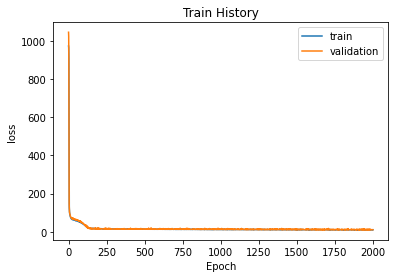

In [ ]:
#1000
show_train_history(train_history,'loss','val_loss')

**Results for 2000 epochs**

In [ ]:
train_predictions = model.predict(X_train).flatten()

train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train.flatten()})
train_results
train_results.to_csv(r'/content/gdrive/MyDrive/TRM/Aisha/Predictions_train_Results_ANN_2.csv')
train_results

43/43 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,260.287933,257.0
1,405.766785,413.0
2,1827.628662,1832.0
3,1639.005615,1636.0
4,1239.665039,1236.0
...,...,...
1364,646.613342,645.0
1365,1638.580811,1637.0
1366,659.284668,664.0
1367,1387.505615,1390.0


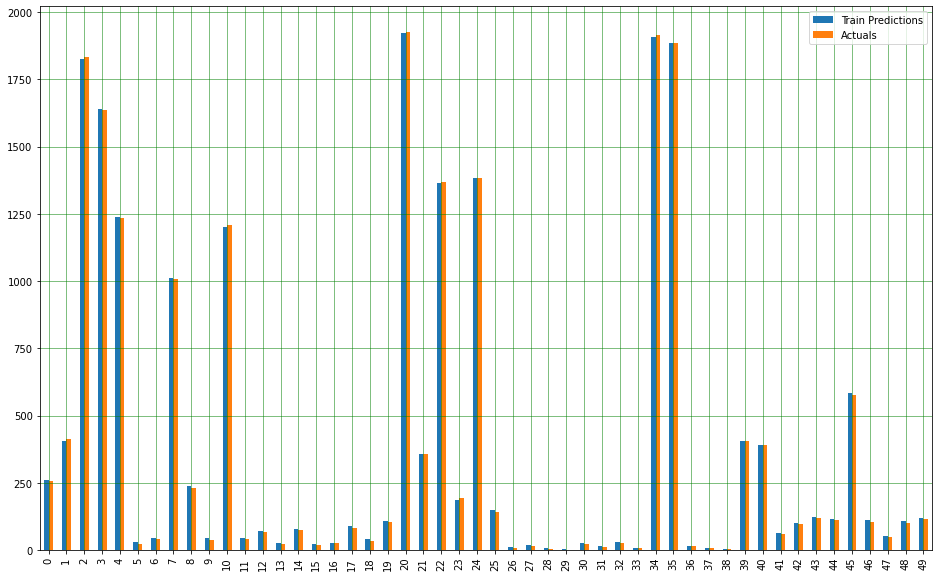

In [ ]:
res1 = train_results.head(50)
res1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
test_predictions = model.predict(X_test).flatten()

test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test.flatten()})
test_results
test_results.to_csv(r'/content/gdrive/MyDrive/TRM/Aisha/Predictions_train_Results_ANN_2.csv')
test_results

11/11 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,164.889099,161.0
1,1416.404663,1426.0
2,1173.617554,1182.0
3,1606.283325,1601.0
4,1621.872559,1621.0
...,...,...
321,1224.740723,1228.0
322,427.251587,432.0
323,261.305267,261.0
324,525.316895,529.0


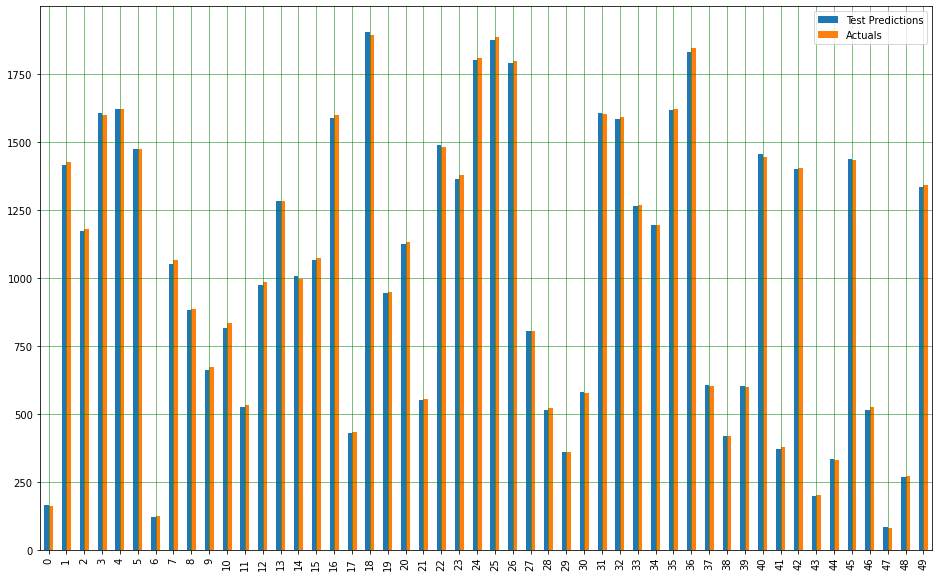

In [ ]:
res2 = test_results.head(50)
res2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluate with top 30


In [ ]:
# Import dataset
df_2 = pd.read_csv('/content/gdrive/MyDrive/TRM/Aisha/DL-dataset-sorted.csv')
df_2

,CPU-Utilization,Memory-Usage,Rank
0,0.000000,0.189970,1
1,0.000000,0.362440,2
2,0.000303,1.039800,3
3,0.002472,1.506800,4
4,0.000000,2.711200,5
...,...,...,...
1995,95.885743,97.890155,1996
1996,95.801930,98.632079,1997
1997,97.256318,95.557307,1998
1998,98.732269,92.295733,1999


In [ ]:
decisions_2 = pd.DataFrame()
decisions_2['CPU-Utilization'] = df_2['CPU-Utilization']
decisions_2['Memory-Usage'] = df_2['Memory-Usage']
decisions_2['Rank'] = df_2['Rank']
decisions_2.head(30)

,CPU-Utilization,Memory-Usage,Rank
0,0.000000,0.189970,1
1,0.000000,0.362440,2
2,0.000303,1.039800,3
3,0.002472,1.506800,4
4,0.000000,2.711200,5
5,0.047836,1.304200,6
6,0.057987,2.212800,7
7,0.131620,2.221200,8
8,0.175970,2.050500,9
9,0.031147,2.885200,10


In [ ]:
test_data_top = decisions_2[0:30]

In [ ]:
tmp_top = np.array(test_data_top)
X_test_top = tmp_top[:, :-1]
y_test_top = tmp_top[:, -1]


In [ ]:
test_acc_top = model.evaluate(X_test_top, y_test_top)
print('MAE test top : {:.3f}'.format(test_acc_top[1]))

1/1 [==============================] - 0s 20ms/step - loss: 0.8262 - mean_absolute_error: 0.8262
MAE test top : 0.826


In [ ]:
test_predictions_top = model.predict(X_test_top).flatten()
test_results_top = pd.DataFrame(data={'Test Predictions':test_predictions_top, 'Actuals':y_test_top.flatten()})
test_results_top.to_csv(r'/content/gdrive/MyDrive/TRM/Aisha/Predictions_Test_Top_Results_ANN_2.csv')
test_results_top

1/1 [==============================] - 0s 74ms/step


,Test Predictions,Actuals
0,1.330623,1.0
1,1.659389,2.0
2,3.140752,3.0
3,4.317758,4.0
4,8.125380,5.0
5,4.257784,6.0
6,7.128309,7.0
7,8.231091,8.0
8,8.200023,9.0
9,9.311438,10.0


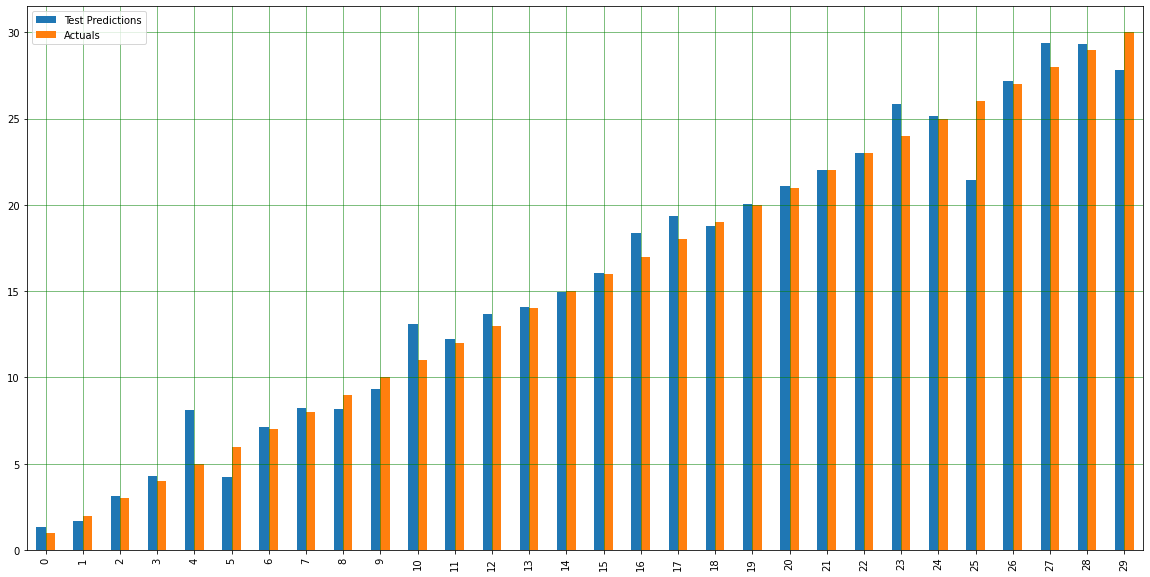

In [ ]:
res3 = test_results_top.head(30)
res3.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()